In [40]:
# All project imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import LinearSVC

In [2]:
# Load the dataset
df = pd.read_csv("../Raw_data/heart_2020.csv")
# Drop columns that are not important to the dataset
df.drop(columns=["PhysicalHealth", "MentalHealth", "SleepTime"], inplace=True)
# Print the name of each column, as well as the unique values found in each column
for column in df:
    print("%s -> " % (column), df[column].unique())

HeartDisease ->  ['No' 'Yes']
BMI ->  [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking ->  ['Yes' 'No']
AlcoholDrinking ->  ['No' 'Yes']
Stroke ->  ['No' 'Yes']
DiffWalking ->  ['No' 'Yes']
Sex ->  ['Female' 'Male']
AgeCategory ->  ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ->  ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ->  ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ->  ['Yes' 'No']
GenHealth ->  ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma ->  ['Yes' 'No']
KidneyDisease ->  ['No' 'Yes']
SkinCancer ->  ['Yes' 'No']


One-Hot-Encoding Step

In [3]:
# One-hot encode categorical attributes in the dataset

# List of all attribute that we wish to one-hot encode or binary encode
categorical_attributes = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "Race", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
# If an attribute has only two categories, only create one new attribute when encoding it.
# Normally, one-hot encoding would create two new attributes for binary categories.
encoder = OneHotEncoder(drop="if_binary")
# Generate an encoding scheme for the specified columns
encoder.fit(df[categorical_attributes])
# Print the names of all the new attributes created by the one-hot encoder
print(encoder.get_feature_names_out(categorical_attributes))
# Replace the categorical columns in the DataFrame with the new, one-hot encoded columns
encoded_df = pd.DataFrame(encoder.transform(df[categorical_attributes]).toarray(), columns=encoder.get_feature_names_out(categorical_attributes))
df = df.drop(columns=categorical_attributes).join(encoded_df)
print(df.head(1))

['HeartDisease_Yes' 'Smoking_Yes' 'AlcoholDrinking_Yes' 'Stroke_Yes'
 'DiffWalking_Yes' 'Sex_Male' 'Race_American Indian/Alaskan Native'
 'Race_Asian' 'Race_Black' 'Race_Hispanic' 'Race_Other' 'Race_White'
 'Diabetic_No' 'Diabetic_No, borderline diabetes' 'Diabetic_Yes'
 'Diabetic_Yes (during pregnancy)' 'PhysicalActivity_Yes' 'Asthma_Yes'
 'KidneyDisease_Yes' 'SkinCancer_Yes']
    BMI AgeCategory  GenHealth  HeartDisease_Yes  Smoking_Yes  \
0  16.6       55-59  Very good               0.0          1.0   

   AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
0                  0.0         0.0              0.0       0.0   

   Race_American Indian/Alaskan Native  ...  Race_Other  Race_White  \
0                                  0.0  ...         0.0         1.0   

   Diabetic_No  Diabetic_No, borderline diabetes  Diabetic_Yes  \
0          0.0                               0.0           1.0   

   Diabetic_Yes (during pregnancy)  PhysicalActivity_Yes  Asthma_Yes  \
0        

Ordinal Encoding Step

In [4]:
# Encode categorical attributes that have a logical ordering. Since such an ordering exists,
# we can avoid creating extraneous columns by assigning a number to each category, rather than
# trying to use a one-hot encoding scheme for them.

# There are only two categorical attributes which have a logical ordering
categorical_attributes = ["AgeCategory", "GenHealth"]
# List the possible categories for each attribute in their logical order
age_categories = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older"]
health_categories = ["Poor", "Fair", "Good", "Very good", "Excellent"]
# Create the ordinal encoder and generate the encoding scheme for our DataFrame
encoder = OrdinalEncoder(categories=[age_categories, health_categories])
encoder.fit(df[categorical_attributes])
# Replace the categorical columns in the DataFrame with the new, ordinal-encoded columns
encoded_df = pd.DataFrame(encoder.transform(df[categorical_attributes]), columns=["AgeCategory_Ordinal", "GenHealth_Ordinal"])
df = df.drop(columns=categorical_attributes).join(encoded_df)
print(df.head(1))

    BMI  HeartDisease_Yes  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
0  16.6               0.0          1.0                  0.0         0.0   

   DiffWalking_Yes  Sex_Male  Race_American Indian/Alaskan Native  Race_Asian  \
0              0.0       0.0                                  0.0         0.0   

   Race_Black  ...  Diabetic_No  Diabetic_No, borderline diabetes  \
0         0.0  ...          0.0                               0.0   

   Diabetic_Yes  Diabetic_Yes (during pregnancy)  PhysicalActivity_Yes  \
0           1.0                              0.0                   1.0   

   Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  AgeCategory_Ordinal  \
0         1.0                0.0             1.0                  7.0   

   GenHealth_Ordinal  
0                3.0  

[1 rows x 23 columns]


Standardize BMI column using min-max scaling. Only one column affected.

In [5]:
df[['BMI']] = minmax_scale(df[['BMI']])
print(df.head(1))

        BMI  HeartDisease_Yes  Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  \
0  0.055294               0.0          1.0                  0.0         0.0   

   DiffWalking_Yes  Sex_Male  Race_American Indian/Alaskan Native  Race_Asian  \
0              0.0       0.0                                  0.0         0.0   

   Race_Black  ...  Diabetic_No  Diabetic_No, borderline diabetes  \
0         0.0  ...          0.0                               0.0   

   Diabetic_Yes  Diabetic_Yes (during pregnancy)  PhysicalActivity_Yes  \
0           1.0                              0.0                   1.0   

   Asthma_Yes  KidneyDisease_Yes  SkinCancer_Yes  AgeCategory_Ordinal  \
0         1.0                0.0             1.0                  7.0   

   GenHealth_Ordinal  
0                3.0  

[1 rows x 23 columns]


Split the Data

In [6]:
# Separate the data into input (X) and output (y)
X = df.drop(columns="HeartDisease_Yes")
y = df["HeartDisease_Yes"]
# Further split the data into training sets and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Model 1: Logistic Regression

In [25]:
# Instantiate a logistic regression model
base_logistic_model = LogisticRegression(max_iter=1000)
# Define a hyperparameter space to search through. This will
# allow the model to find the hyperparameter values that yield
# the highest cross-validated accuracy.
logistic_parameters = [
    {
        "penalty": ["l1"], 
        "solver": ["liblinear", "saga"], 
        "C": [0.1, 1.0, 100.0]
    },
    {
        "penalty": ["l2"], 
        "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 
        "C": [0.1, 1.0, 100.0]
    }
]
# Initialize a grid search object. Make it use recall as its performance
# metric when comparing models with different hyperparameters. For our
# application, high recall is important because we want as few false
# negatives as possible; we do not want our classifier to classify anyone
# as not having heart disease when they do, in fact, have heart disease.
tuned_logistic_model = GridSearchCV(base_logistic_model, param_grid=logistic_parameters, scoring="recall", n_jobs=-1)
# Search the hyperparameter space for the best-performing model on the training data
tuned_logistic_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': [0.1, 1.0, 100.0], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.1, 1.0, 100.0], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='recall')

Best hyperparmaters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best training recall:  0.11168399262701696
Test recall: 0.104364
Test accuracy: 0.915072


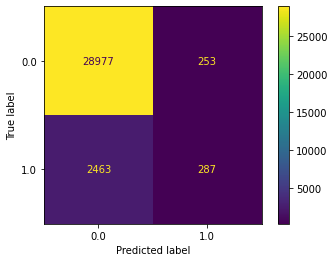

count    21.000000
mean      0.111392
std       0.000115
min       0.111156
25%       0.111359
50%       0.111440
75%       0.111440
max       0.111684
Name: mean_test_score, dtype: float64

In [31]:
print("Best hyperparmaters: ", tuned_logistic_model.best_params_)
print("Best training recall: ", tuned_logistic_model.best_score_)

y_pred_logistic = tuned_logistic_model.predict(X_test)
print("Test recall: %f" % recall_score(y_true=y_test, y_pred=y_pred_logistic))
print("Test accuracy: %f" % accuracy_score(y_true=y_test, y_pred=y_pred_logistic))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic)
plt.show()
pd.DataFrame(tuned_logistic_model.cv_results_)["mean_test_score"].describe()

## Model 2: K-Nearest Neighbors

In [33]:
tuned_neighbors_model = None
y_pred_neighbors = None
highest_neighbors_recall = -1
recall_scores = []
k_values = [1, 5, 9]
for i in range(len(k_values)):
    neighbors_model = KNeighborsClassifier(n_neighbors=k_values[i])
    neighbors_model.fit(X_train, y_train)
    y_pred = neighbors_model.predict(X_test)
    recall = recall_score(y_true=y_test, y_pred=y_pred)
    recall_scores.append(recall)
    if recall > highest_neighbors_recall:
        highest_neighbors_recall = recall
        tuned_neighbors_model = neighbors_model
        y_pred_neighbors = y_pred

Best hyperparmater (k):  1
Test recall: 0.230909
Test accuracy: 0.868418


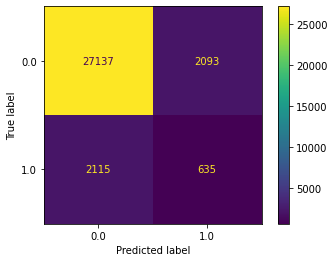

Recall score for each version of the model:  [0.2309090909090909, 0.1338181818181818, 0.10181818181818182]


In [34]:
print("Best hyperparmater (k): ", k_values[np.argmax(recall_scores)])

print("Test recall: %f" % recall_score(y_true=y_test, y_pred=y_pred_neighbors))
print("Test accuracy: %f" % accuracy_score(y_true=y_test, y_pred=y_pred_neighbors))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_neighbors)
plt.show()
print("Recall score for each version of the model: ", recall_scores)

## Model 3: Naive Bayes Classifier

In [55]:
average_bmi = X_train["BMI"].mean()
X_train_bayes = X_train.copy()
X_train_bayes["BMI"] = X_train_bayes["BMI"].map(lambda a: (0 if a < average_bmi else 1))
X_test_bayes = X_test.copy()
X_test_bayes["BMI"] = X_test_bayes["BMI"].map(lambda a: (0 if a < average_bmi else 1))

bayes_model = BernoulliNB(binarize=None)
bayes_model.fit(X_train_bayes, y_train)
y_pred_bayes = bayes_model.predict(X_test_bayes)
print("Test recall: %f" % recall_score(y_true=y_test, y_pred=y_pred_bayes))
print("Test accuracy: %f" % accuracy_score(y_true=y_test, y_pred=y_pred_bayes))

Test recall: 0.000000
Test accuracy: 0.914009


c:\Python39\lib\site-packages\sklearn\naive_bayes.py:1183: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [56]:
bayes_model = ComplementNB()
bayes_model.fit(X_train_bayes, y_train)
y_pred_bayes = bayes_model.predict(X_test_bayes)
print("Test recall: %f" % recall_score(y_true=y_test, y_pred=y_pred_bayes))
print("Test accuracy: %f" % accuracy_score(y_true=y_test, y_pred=y_pred_bayes))

Test recall: 0.719636
Test accuracy: 0.757223


In [52]:
base_bayes_model = ComplementNB()

bayes_parameters = {
    "alpha": [0.0, 1.0],
    "norm": [False, True]
}
tuned_bayes_model = GridSearchCV(base_bayes_model, param_grid=bayes_parameters, scoring="recall", n_jobs=-1)
tuned_bayes_model.fit(X_train_bayes, y_train)

c:\Python39\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


GridSearchCV(estimator=ComplementNB(), n_jobs=-1,
             param_grid={'alpha': [0.0, 1.0], 'norm': [False, True]},
             scoring='recall')

Best hyperparmaters:  {'alpha': 0.0, 'norm': False}
Best training recall:  0.7195711711414516
Test recall: 0.719636
Test accuracy: 0.757223


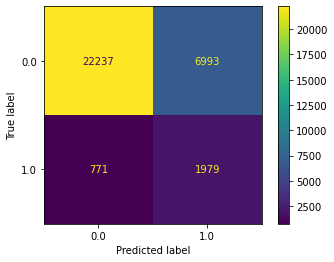

count    21.000000
mean      0.111392
std       0.000115
min       0.111156
25%       0.111359
50%       0.111440
75%       0.111440
max       0.111684
Name: mean_test_score, dtype: float64

In [57]:
print("Best hyperparmaters: ", tuned_bayes_model.best_params_)
print("Best training recall: ", tuned_bayes_model.best_score_)

y_pred_bayes = tuned_bayes_model.predict(X_test_bayes)
print("Test recall: %f" % recall_score(y_true=y_test, y_pred=y_pred_bayes))
print("Test accuracy: %f" % accuracy_score(y_true=y_test, y_pred=y_pred_bayes))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bayes)
plt.show()
pd.DataFrame(tuned_logistic_model.cv_results_)["mean_test_score"].describe()

## Model 4: Support Vector Machine (SVM)

In [ ]:
base_svm_model = LinearSVC()

svm_parameters = [
    {
        "penalty": ["l1"],
        "loss": ["squared_hinge"],
        "dual": [False],
        "C": [0.1, 1.0, 100.0]
    },
    {
        "penalty": ["l2"],
        "loss": ["squared_hinge"],
        "dual": [False, True],
        "C": [0.1, 1.0, 100.0]
    },
    {
        "penalty": ["l2"],
        "loss": ["hinge"],
        "dual": [True],
        "C": [0.1, 1.0, 100.0]
    }
]
tuned_svm_model = GridSearchCV(base_svm_model, param_grid=svm_parameters, scoring="recall", n_jobs=-1)
tuned_svm_model.fit(X_train, y_train)

Best hyperparmaters:  {'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}
Best training recall:  0.0370791853431035
Test recall: 0.037818
Test accuracy: 0.915228


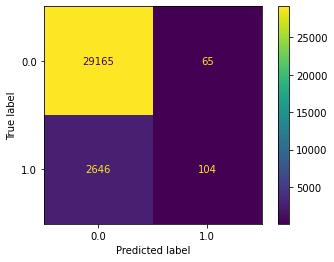

count    9.000000
mean     0.033433
std      0.010312
min      0.005970
25%      0.037039
50%      0.037039
75%      0.037079
max      0.037079
Name: mean_test_score, dtype: float64

In [65]:
print("Best hyperparmaters: ", tuned_svm_model.best_params_)
print("Best training recall: ", tuned_svm_model.best_score_)

y_pred_svm = tuned_svm_model.predict(X_test)
print("Test recall: %f" % recall_score(y_true=y_test, y_pred=y_pred_svm))
print("Test accuracy: %f" % accuracy_score(y_true=y_test, y_pred=y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.show()
pd.DataFrame(tuned_svm_model.cv_results_)["mean_test_score"].describe()